# Data Viziuliation and Subsetting

- What are the chances that you are either a murderer or a victim depending on the set variables and attributes
    - What are the characteristics of murderers or victims
    - What kind of relationship is between the data
    - Identify the serial killer activity per location and year
    - Identify interasting relationships (correlation) between different variables later to be used for building a 
        decision tree and clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [7]:
data2 = pd.read_csv("../US HOMICIDE REPORT.csv")
data2.info()

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [8]:
safe_danger = data2.groupby('State')[['Perpetrator Count', 'Victim Count']].agg(['sum','mean','std'])
safe_danger

Perpetrator Count                     Victim Count  \
                                   sum      mean       std          sum   
State                                                                     
Alabama                            738  0.064873  0.304129          512   
Alaska                             213  0.131725  0.453904          380   
Arizona                           1908  0.148240  0.515280         1698   
Arkansas                          1484  0.213617  0.637736         1068   
California                       19198  0.192398  0.561115        11450   
Colorado                          1564  0.237221  0.674720         1040   
Connecticut                        777  0.158701  0.518048         1090   
Delaware                           421  0.357082  0.848782          134   
District of Columbia               447  0.062825  0.282792          208   
Florida                           4868  0.130987  0.519365         4099   
Georgia                           2812  0.133346  0.496921         1880   
Hawaii                             225  0.168161  0.596151          160   
Idaho                              350  0.304348  0.873893          270   
Illinois                          4818  0.186232  0.608747         2468   
Indiana                           1716  0.149699  0.478933         1764   
Iowa                               418  0.238994  0.715192          342   
Kansas                             711  0.230470  0.678352          520   
Kentucky                           975  0.148764  0.527289          806   
Louisiana                         2889  0.147180  0.502885         2100   
Maine                               71  0.081703  0.338060          186   
Maryland                          3016  0.174214  0.518758         1712   
Massachusetts                     1042  0.172631  0.573094          838   
Michigan                          6660  0.234111  0.663488         3620   
Minnesota                          884  0.222390  0.639146          612   
Mississippi                       1000  0.152765  0.546009          610   
Missouri                          2521  0.169970  0.523760         1846   
Montana                            137  0.227953  0.789272          124   
Nebraska                           291  0.218633  0.686813          194   
Nevada                             964  0.173600  0.563454          704   
New Hampshire                       66  0.100763  0.458274          142   
New Jersey                        2270  0.160628  0.584479         1698   
New Mexico                         689  0.161283  0.508848          546   
New York                          7768  0.157668  0.505541         5604   
North Carolina                    4191  0.205542  0.621345         2626   
North Dakota                        81  0.262987  0.743480           90   
Ohio                              3343  0.174496  0.578795         2736   
Oklahoma                          2131  0.241912  0.655748         2698   
Oregon                             770  0.182594  0.585523          596   
Pennsylvania                      3893  0.160629  0.501768         3244   
Rhodes Island                      194  0.160198  0.566942          166   
South Carolina                    4915  0.420157  0.985573         1492   
South Dakota                        68  0.153846  0.507402           76   
Tennessee                         3385  0.226725  0.639509         1526   
Texas                            12093  0.194750  0.592057         7048   
Utah                               642  0.315789  0.994390          594   
Vermont                             67  0.162621  0.517585          148   
Virginia                          3736  0.240722  0.707615         2320   
Washington                        1991  0.254766  0.765235         1456   
West Virginia                      623  0.203528  0.594694          572   
Wisconsin                         2109  0.340656  0.882111          834   
Wyoming                            114  0.1809

In [9]:
sub = data2[["Perpetrator Sex", "Victim Sex"]]
sub

,Perpetrator Sex,Victim Sex
0,Male,Male
1,Male,Male
2,Unknown,Female
3,Male,Male
4,Unknown,Female
...,...,...
638449,Unknown,Male
638450,Male,Male
638451,Female,Female
638452,Male,Male


In [10]:
data2.head()
perpretrator_greater_victim = data2[data2['Perpetrator Count'] > data2['Victim Count']] 
perpretrator_greater_victim

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
9,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,...,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI
10,11,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
17,18,AK00103,Juneau,Municipal Police,Juneau,Alaska,1980,November,1,Murder or Manslaughter,...,Unknown,Male,23,Native American/Alaska Native,Unknown,Brother,Blunt Object,0,1,FBI
54,55,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,3,Murder or Manslaughter,...,Not Hispanic,Male,26,Black,Not Hispanic,Acquaintance,Handgun,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638438,638439,WVWSP65,Sp: Hundred,State Police,Wood,West Virginia,2014,January,2,Murder or Manslaughter,...,Unknown,Unknown,50,Unknown,Unknown,Acquaintance,Knife,0,2,FBI
638439,638440,WVWSP65,Sp: Hundred,State Police,Wood,West Virginia,2014,January,3,Murder or Manslaughter,...,Unknown,Male,25,White,Unknown,Acquaintance,Knife,0,1,FBI
638444,638445,WY01101,Cheyenne,Municipal Police,Laramie,Wyoming,2014,December,1,Murder or Manslaughter,...,Hispanic,Male,35,White,Unknown,Acquaintance,Suffocation,0,3,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [11]:
perpretrator_greater_victim['Perpetrator Age'] = perpretrator_greater_victim['Perpetrator Age'].astype(int)
perpretrator_greater_victim = perpretrator_greater_victim[perpretrator_greater_victim['Perpetrator Age'] > 6] 
perpretrator_greater_victim

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
9,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,...,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI
17,18,AK00103,Juneau,Municipal Police,Juneau,Alaska,1980,November,1,Murder or Manslaughter,...,Unknown,Male,23,Native American/Alaska Native,Unknown,Brother,Blunt Object,0,1,FBI
54,55,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,3,Murder or Manslaughter,...,Not Hispanic,Male,26,Black,Not Hispanic,Acquaintance,Handgun,0,1,FBI
57,58,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,August,3,Murder or Manslaughter,...,Unknown,Male,22,Black,Unknown,Stranger,Handgun,0,2,FBI
138,139,AL00102,Birmingham,Municipal Police,Jefferson,Alabama,1980,October,1,Murder or Manslaughter,...,Not Hispanic,Male,30,Black,Not Hispanic,Stranger,Handgun,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638438,638439,WVWSP65,Sp: Hundred,State Police,Wood,West Virginia,2014,January,2,Murder or Manslaughter,...,Unknown,Unknown,50,Unknown,Unknown,Acquaintance,Knife,0,2,FBI
638439,638440,WVWSP65,Sp: Hundred,State Police,Wood,West Virginia,2014,January,3,Murder or Manslaughter,...,Unknown,Male,25,White,Unknown,Acquaintance,Knife,0,1,FBI
638444,638445,WY01101,Cheyenne,Municipal Police,Laramie,Wyoming,2014,December,1,Murder or Manslaughter,...,Hispanic,Male,35,White,Unknown,Acquaintance,Suffocation,0,3,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [12]:
perpetrator_male_vs_female = perpretrator_greater_victim['Perpetrator Count'].groupby(perpretrator_greater_victim['Perpetrator Sex']).sum()
perpetrator_male_vs_female

Perpetrator Sex
Female      7326
Male       87046
Unknown      138
Name: Perpetrator Count, dtype: int64

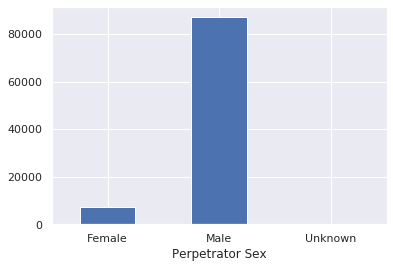

In [13]:
perpetrator_male_vs_female.plot(kind='bar', rot=0)

In [14]:
perpetrator_male_vs_female_by_state = perpretrator_greater_victim['Perpetrator Sex'].groupby(perpretrator_greater_victim['State']).count()
perpetrator_male_vs_female_by_state #could maybe extract by separating male instances and then female instances

State
Alabama                   415
Alaska                    116
Arizona                   878
Arkansas                  765
California              11712
Colorado                  758
Connecticut               404
Delaware                  190
District of Columbia       99
Florida                  2194
Georgia                  1526
Hawaii                     92
Idaho                     161
Illinois                 2686
Indiana                   765
Iowa                      225
Kansas                    343
Kentucky                  538
Louisiana                1307
Maine                      39
Maryland                 1506
Massachusetts             545
Michigan                 2918
Minnesota                 474
Mississippi               530
Missouri                 1304
Montana                    69
Nebraska                  145
Nevada                    469
New Hampshire              33
New Jersey               1266
New Mexico                399
New York                 3583
Nort

In [15]:
perpetrator_older_vs_younger = perpretrator_greater_victim['Perpetrator Count'].groupby(data2['Perpetrator Age']).sum()
perpetrator_older_vs_younger

Perpetrator Age
7      2
8      1
9      4
10    18
11    32
      ..
61     8
62     1
63     2
65     2
66     2
Name: Perpetrator Count, Length: 131, dtype: int64

In [16]:
perpetrator_older_vs_younger = perpetrator_older_vs_younger[perpetrator_older_vs_younger > 100]
perpetrator_older_vs_younger

Perpetrator Age
13     340
14    1047
15    2454
16    4231
17    6622
18    8724
19    8118
20    7874
21    5840
22    5194
23    4547
24    3866
25    4113
26    2897
27    2695
28    2462
29    2102
30    2321
31    1585
32    1452
33    1387
34    1177
35    1254
36     883
37     891
38     789
39     728
40     714
41     527
42     496
43     413
44     404
45     380
46     285
47     284
48     235
49     201
50     227
51     186
52     141
53     115
54     118
17     190
18     233
19     228
20     239
21     249
22     201
23     157
24     155
25     113
26     127
27     104
28     129
29     120
Name: Perpetrator Count, dtype: int64

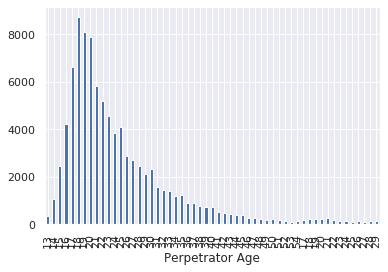

In [17]:
perpetrator_older_vs_younger.plot(kind='bar', rot=90, )

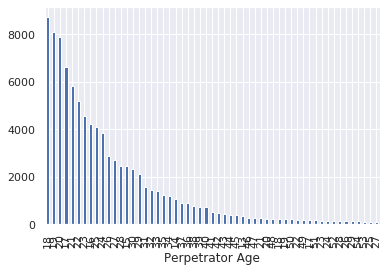

In [18]:
perpetrator_older_vs_younger=perpetrator_older_vs_younger.sort_values(ascending=False)
perpetrator_older_vs_younger.plot(kind='bar', rot=90, )

In [19]:
perpetrator_danger = data2.groupby('State')[['Perpetrator Count', 'Victim Count']].agg(['sum','mean','std'])
perpetrator_danger

Perpetrator Count                     Victim Count  \
                                   sum      mean       std          sum   
State                                                                     
Alabama                            738  0.064873  0.304129          512   
Alaska                             213  0.131725  0.453904          380   
Arizona                           1908  0.148240  0.515280         1698   
Arkansas                          1484  0.213617  0.637736         1068   
California                       19198  0.192398  0.561115        11450   
Colorado                          1564  0.237221  0.674720         1040   
Connecticut                        777  0.158701  0.518048         1090   
Delaware                           421  0.357082  0.848782          134   
District of Columbia               447  0.062825  0.282792          208   
Florida                           4868  0.130987  0.519365         4099   
Georgia                           2812  0.133346  0.496921         1880   
Hawaii                             225  0.168161  0.596151          160   
Idaho                              350  0.304348  0.873893          270   
Illinois                          4818  0.186232  0.608747         2468   
Indiana                           1716  0.149699  0.478933         1764   
Iowa                               418  0.238994  0.715192          342   
Kansas                             711  0.230470  0.678352          520   
Kentucky                           975  0.148764  0.527289          806   
Louisiana                         2889  0.147180  0.502885         2100   
Maine                               71  0.081703  0.338060          186   
Maryland                          3016  0.174214  0.518758         1712   
Massachusetts                     1042  0.172631  0.573094          838   
Michigan                          6660  0.234111  0.663488         3620   
Minnesota                          884  0.222390  0.639146          612   
Mississippi                       1000  0.152765  0.546009          610   
Missouri                          2521  0.169970  0.523760         1846   
Montana                            137  0.227953  0.789272          124   
Nebraska                           291  0.218633  0.686813          194   
Nevada                             964  0.173600  0.563454          704   
New Hampshire                       66  0.100763  0.458274          142   
New Jersey                        2270  0.160628  0.584479         1698   
New Mexico                         689  0.161283  0.508848          546   
New York                          7768  0.157668  0.505541         5604   
North Carolina                    4191  0.205542  0.621345         2626   
North Dakota                        81  0.262987  0.743480           90   
Ohio                              3343  0.174496  0.578795         2736   
Oklahoma                          2131  0.241912  0.655748         2698   
Oregon                             770  0.182594  0.585523          596   
Pennsylvania                      3893  0.160629  0.501768         3244   
Rhodes Island                      194  0.160198  0.566942          166   
South Carolina                    4915  0.420157  0.985573         1492   
South Dakota                        68  0.153846  0.507402           76   
Tennessee                         3385  0.226725  0.639509         1526   
Texas                            12093  0.194750  0.592057         7048   
Utah                               642  0.315789  0.994390          594   
Vermont                             67  0.162621  0.517585          148   
Virginia                          3736  0.240722  0.707615         2320   
Washington                        1991  0.254766  0.765235         1456   
West Virginia                      623  0.203528  0.594694          572   
Wisconsin                         2109  0.340656  0.882111          834   
Wyoming                            114  0.1809